# 1-Explore the Data  

In [1]:
import pandas as pd
import numpy as np 

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
print(train.shape)

(42000, 785)


In [4]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Splitting the Data 
from sklearn.model_selection import train_test_split

x = train.iloc[0:42000,1:]
y = train.iloc[0:42000,:1]

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.1, random_state=42)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37800, 784)
(4200, 784)
(37800, 1)
(4200, 1)


# 2-Data Visualizations

In [7]:
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Frequency')

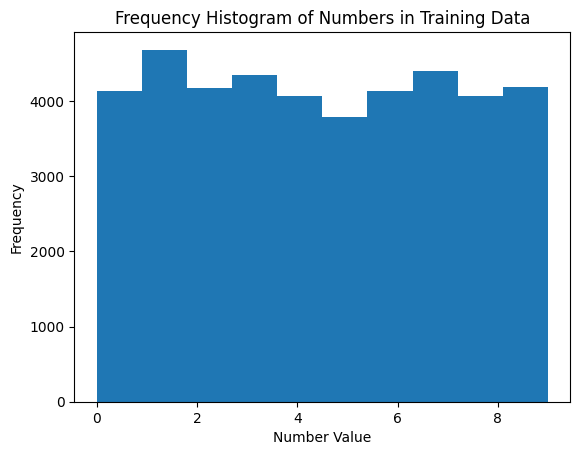

In [8]:
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

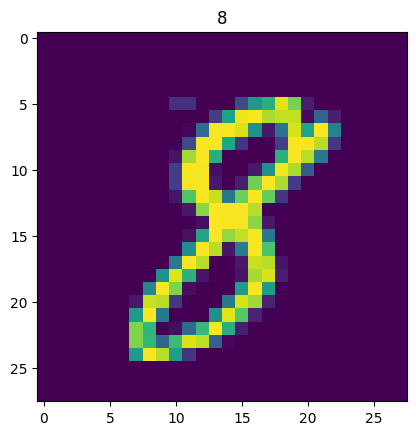

In [9]:
def display(i):
    img = x.iloc[i].values
    img =img.reshape((28, 28))
    plt.imshow(img)                  # cmap='gray' ---> grayscale image
    plt.title(y.iloc[i,0])
    
display(20)

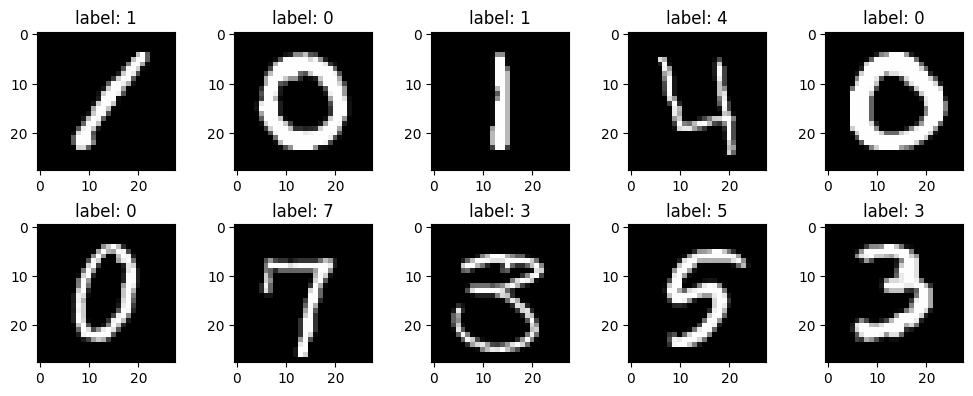

In [10]:
num = 10
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax  = axes[i//num_col, i%num_col]
    img = x.iloc[i].values
    img = img.reshape((28, 28))
    ax.imshow(img, cmap='gray')
    ax.set_title("label: %i" % y.iloc[i,0] )
    
     
plt.tight_layout()
plt.show()

# 3-Model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, softmax


2024-04-24 17:31:54.624471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 17:31:54.624633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 17:31:54.832950: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
#Normalize the Data

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [13]:
model = tf.keras.models.Sequential()
 
model.add(tf.keras.layers.Flatten(input_shape=(784, )))

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
history = model.fit(x_train,y_train,validation_split = 0.3,epochs=30)

Epoch 1/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7832 - loss: 0.8520 - val_accuracy: 0.9257 - val_loss: 0.2524
Epoch 2/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9286 - loss: 0.2265 - val_accuracy: 0.9447 - val_loss: 0.1855
Epoch 3/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9521 - loss: 0.1537 - val_accuracy: 0.9585 - val_loss: 0.1431
Epoch 4/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9632 - loss: 0.1166 - val_accuracy: 0.9616 - val_loss: 0.1295
Epoch 5/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9723 - loss: 0.0917 - val_accuracy: 0.9620 - val_loss: 0.1241
Epoch 6/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9787 - loss: 0.0683 - val_accuracy: 0.9609 - val_loss: 0.1270
Epoch 7/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9807 - loss: 0.0581 - val_accuracy: 0.9660 - val_loss: 0.1135
Epoch 8/30
827/827 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9861 - loss: 0.0470 - val_accuracy: 0.

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,848 (1.35 MB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,566 (924.09 KB)

# 4-Model Evaluation

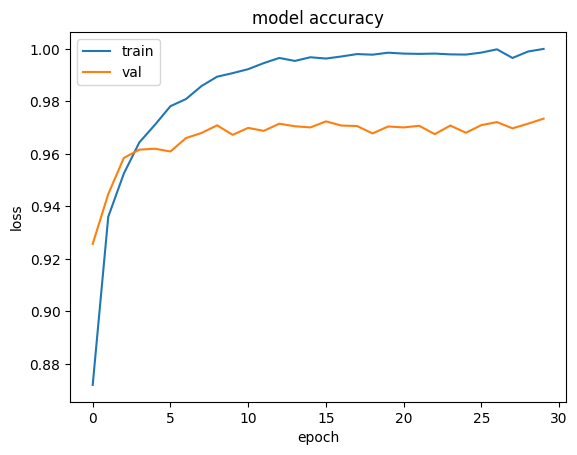

In [15]:
# Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

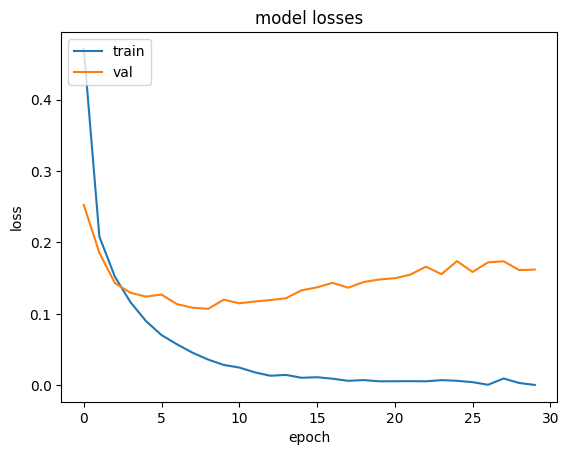

In [16]:
#  Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

*   Train Evaluation

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn import metrics

In [18]:
prediction_train = model.predict(x_train)

print(
    f"Classification report for model {model}:\n"
    f"{metrics.classification_report(y_train, np.argmax(prediction_train, axis=1))}\n"
)

1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification report for model <Sequential name=sequential, built=True>:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3724
           1       0.99      1.00      1.00      4213
           2       0.99      0.99      0.99      3757
           3       0.99      0.99      0.99      3845
           4       0.99      0.99      0.99      3675
           5       0.99      0.99      0.99      3456
           6       0.99      1.00      0.99      3735
           7       0.99      0.99      0.99      3963
           8       0.99      0.99      0.99      3660
           9       0.99      0.99      0.99      3772

    accuracy                           0.99     37800
   macro avg       0.99      0.99      0.99     37800
weighted avg       0.99      0.99      0.99     37800




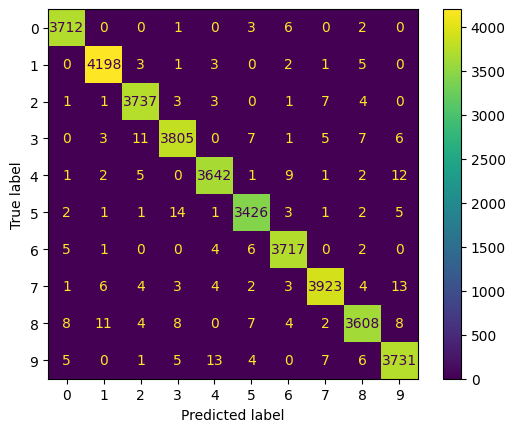

In [19]:
ConfusionMatrixDisplay.from_predictions(y_train,np.argmax(prediction_train, axis=1)) 
# for showing percentage ---> normalize = "true",values_format = ".0%")
plt.show()


* Test Evaluation

In [20]:
val_loss,val_acc = model.evaluate(x_test,y_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9729 - loss: 0.1982


In [21]:
prediction_test = model.predict(x_test)

print(
    f"Classification report for model {model}:\n"
    f"{metrics.classification_report(y_test, np.argmax(prediction_test, axis=1))}\n"
)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification report for model <Sequential name=sequential, built=True>:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.98      0.99      0.99       471
           2       0.98      0.97      0.97       420
           3       0.97      0.97      0.97       506
           4       0.98      0.96      0.97       397
           5       0.96      0.96      0.96       339
           6       0.97      0.98      0.98       402
           7       0.97      0.97      0.97       438
           8       0.96      0.96      0.96       403
           9       0.96      0.98      0.97       416

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200




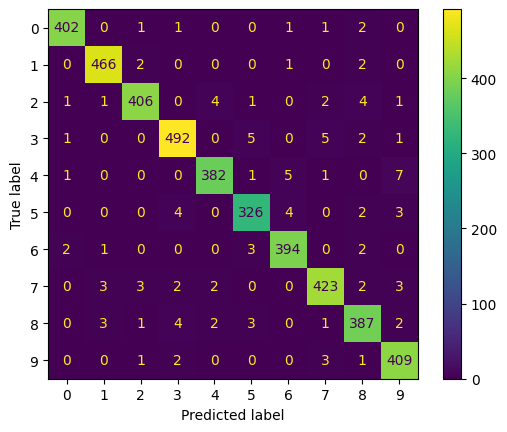

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,np.argmax(prediction_test, axis=1)) 
plt.show()


# 5-Submission

In [23]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test = tf.keras.utils.normalize(test,axis=1)

In [24]:
Final_predictions = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [25]:
submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
submission["Label"] = np.argmax(Final_predictions , axis=1)

In [26]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [27]:
submission.to_csv("Final submission.csv", index=False)